In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train_project3.csv')
df_test = pd.read_csv('test.csv.gz')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [105]:
df.shape

(1460, 81)

In [2]:
df.columns[df.isnull().any()] # columns with missing values; all rows have at least one missing value 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [3]:
df[df.columns[df.isnull().any()]].dtypes # type of data with missing values 

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [4]:
sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0) # number of rows with at least one missing value 

1460

In [5]:
df[df.columns[df.isnull().any()]].isnull().apply(lambda x: x.value_counts())

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
False,1201,91,1452,1452,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379,1379,7,281,54
True,259,1369,8,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406


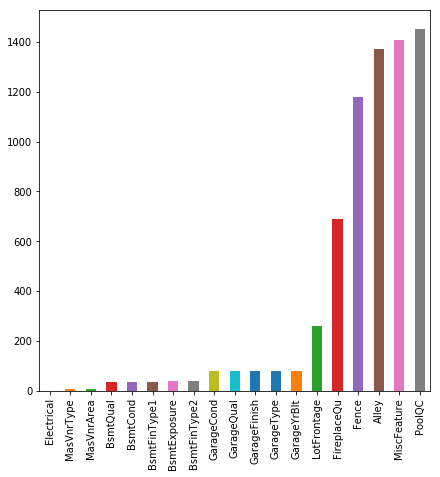

In [150]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(7,7))
missing.plot.bar()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

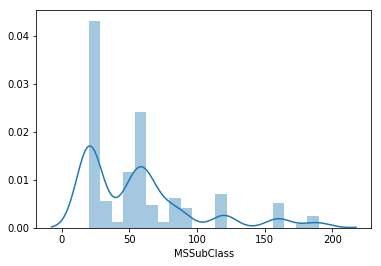

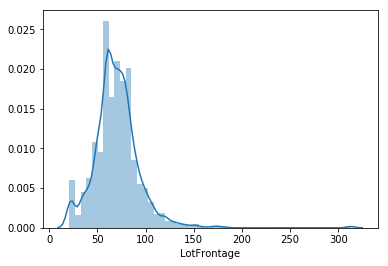

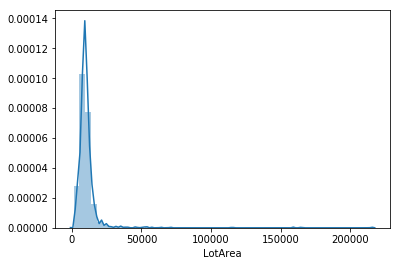

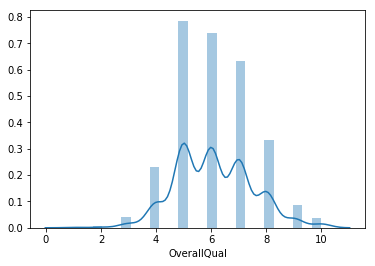

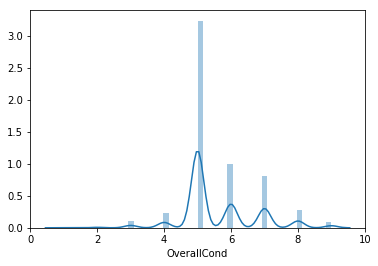

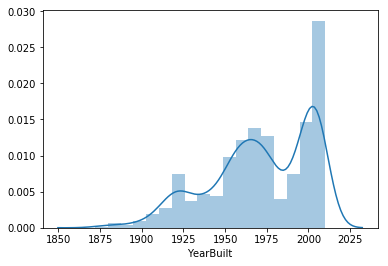

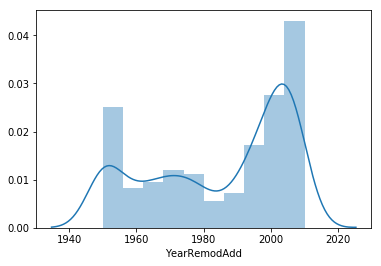

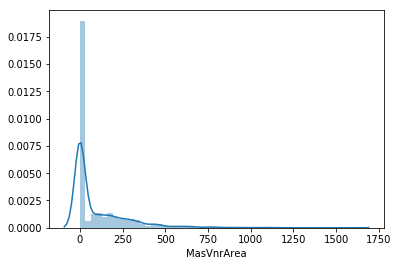

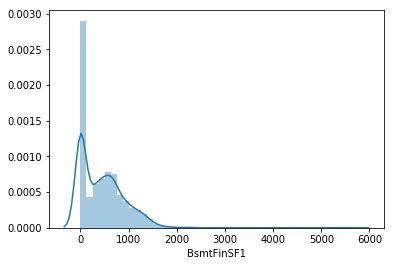

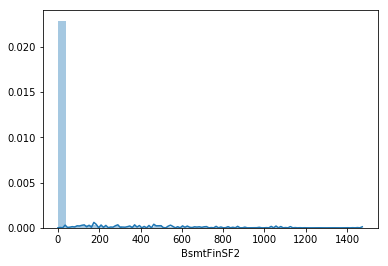

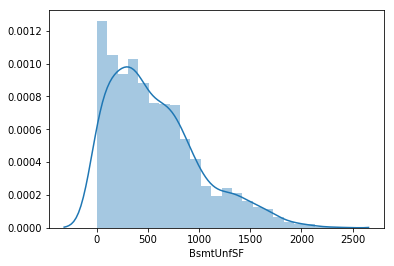

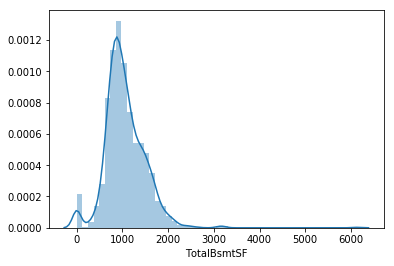

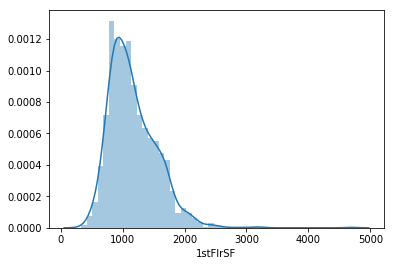

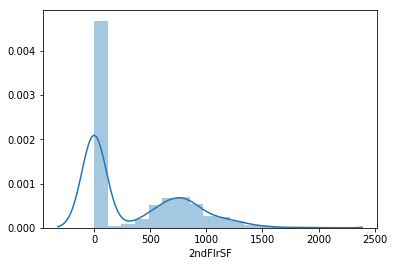

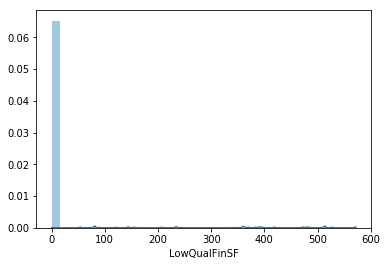

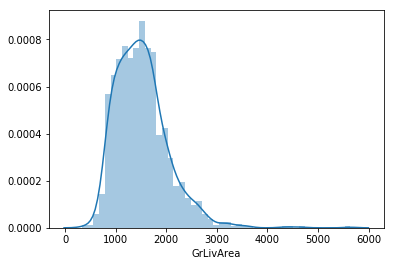

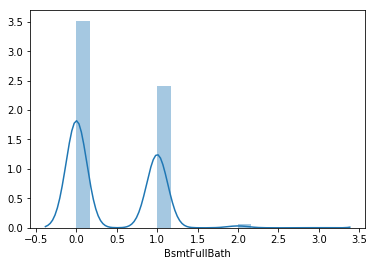

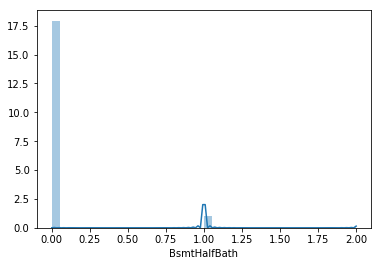

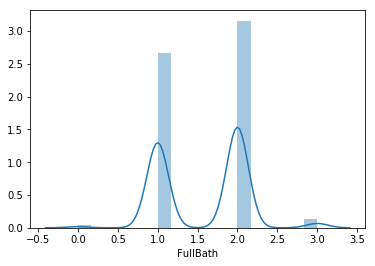

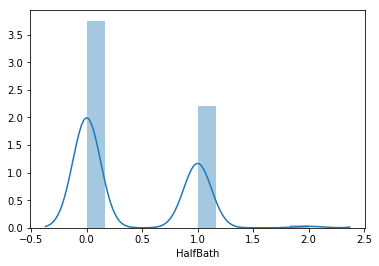

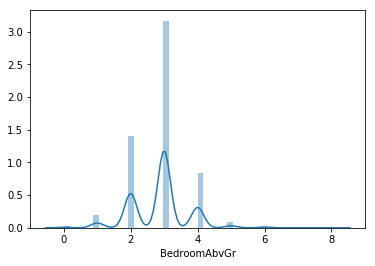

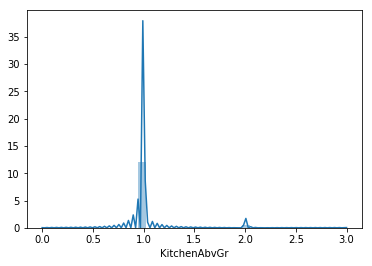

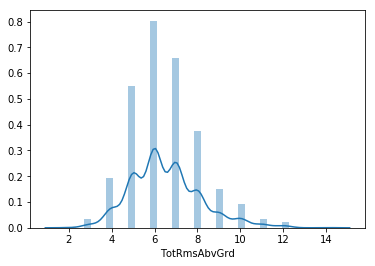

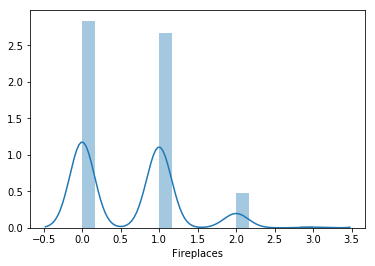

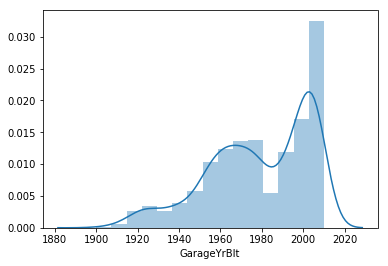

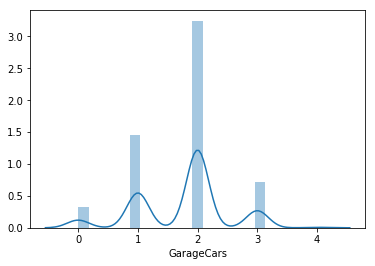

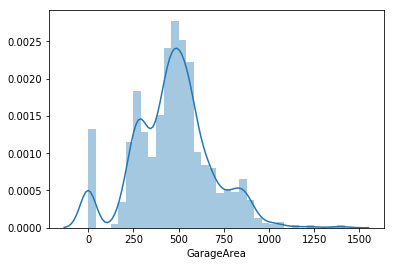

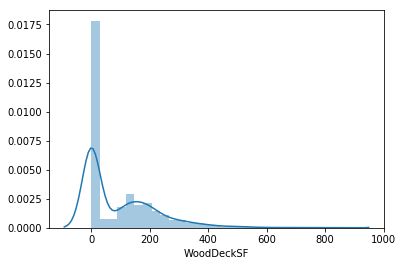

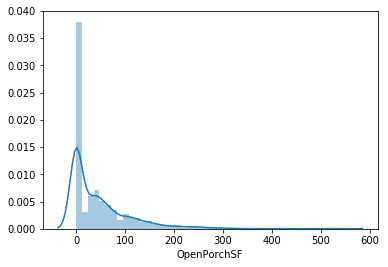

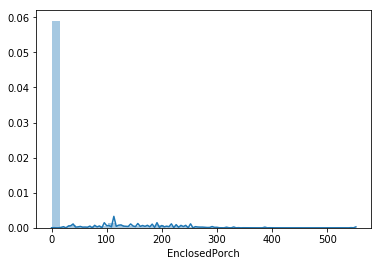

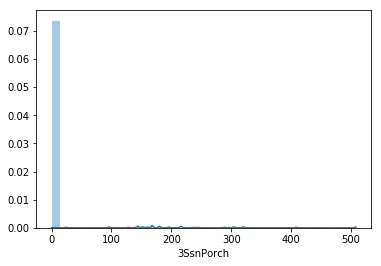

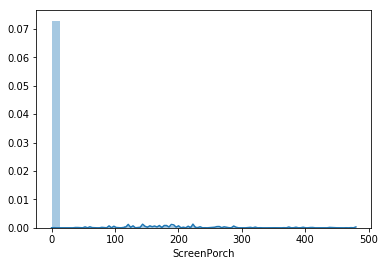

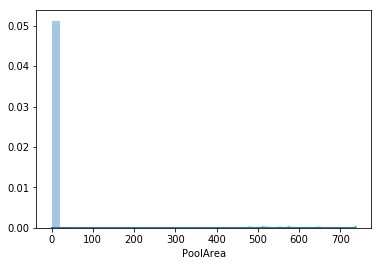

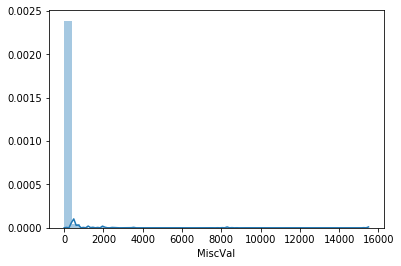

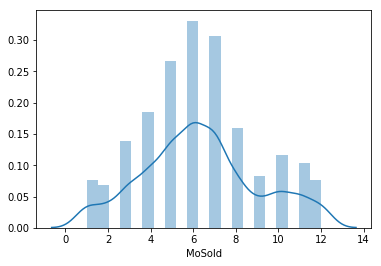

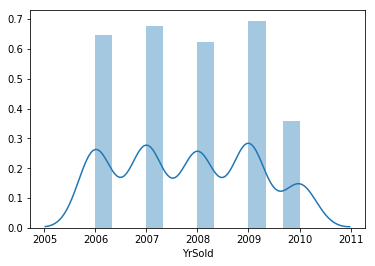

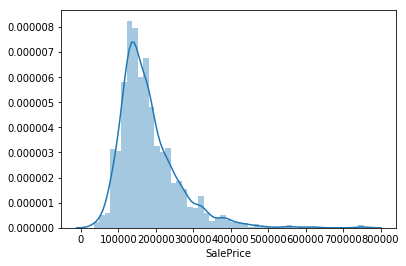

In [2]:
numeric = df.select_dtypes(include=['int64', 'float64'])
# numerical columns are not normally distributed
del numeric['Id']
for i, col in enumerate(numeric.columns):
    plt.figure(i)
    sns.distplot(numeric[col].dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


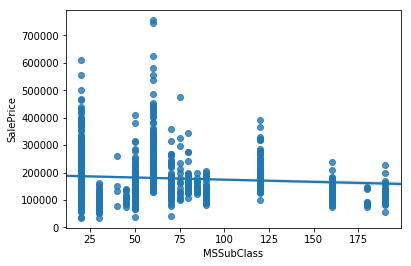

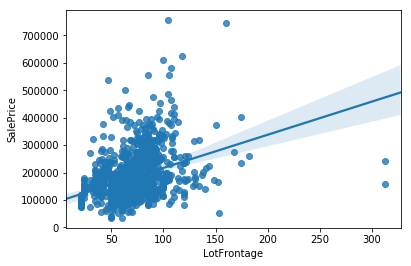

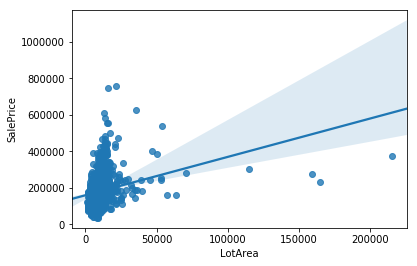

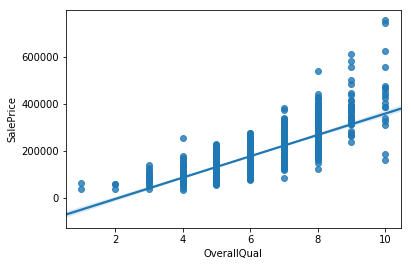

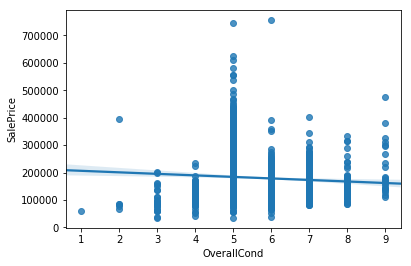

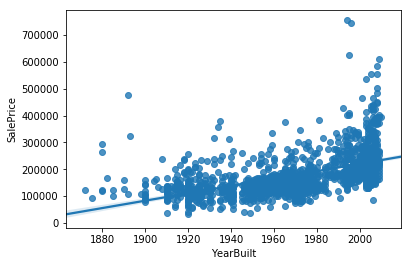

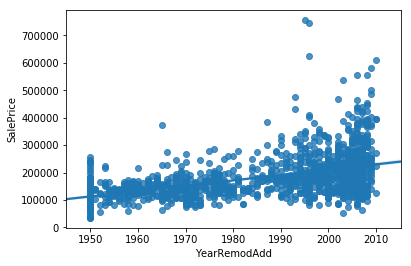

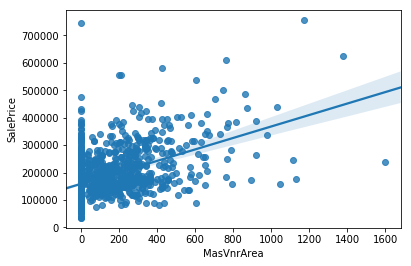

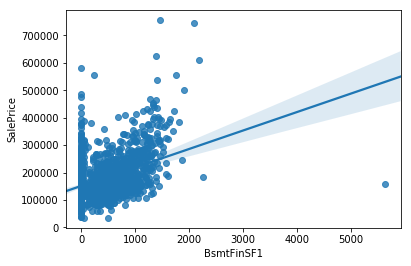

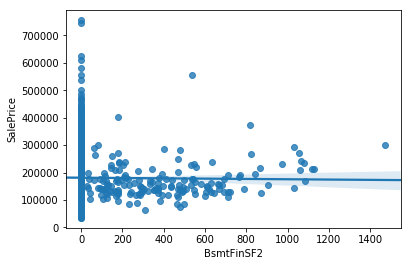

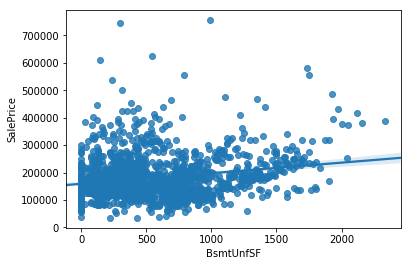

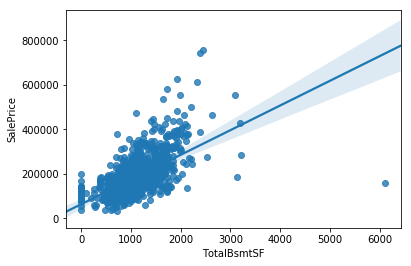

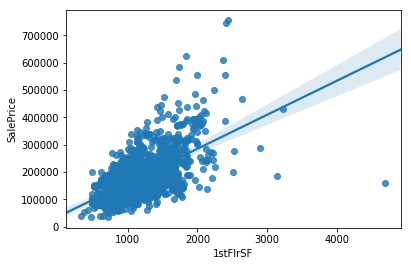

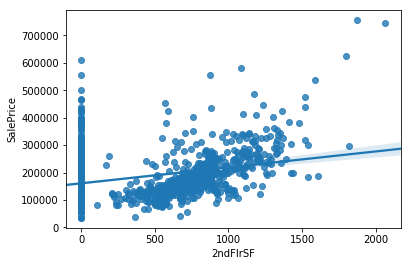

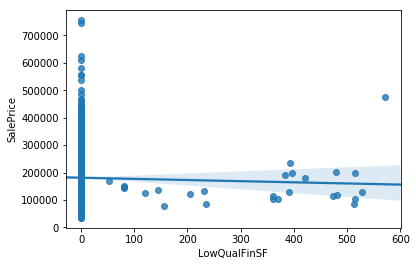

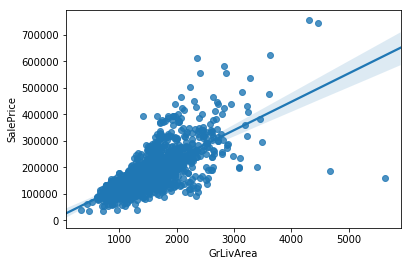

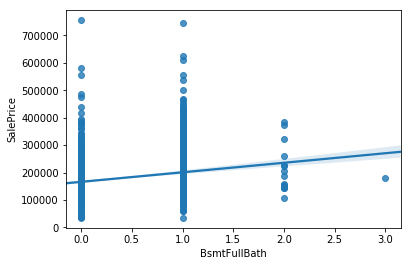

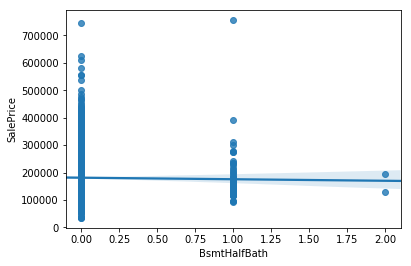

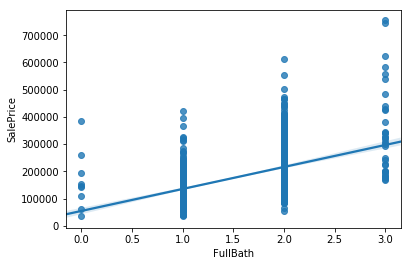

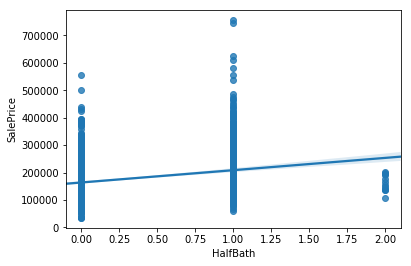

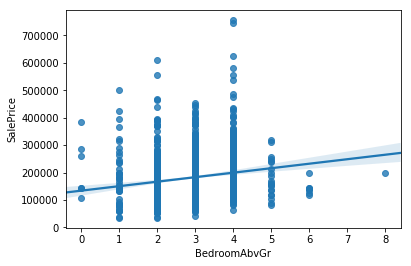

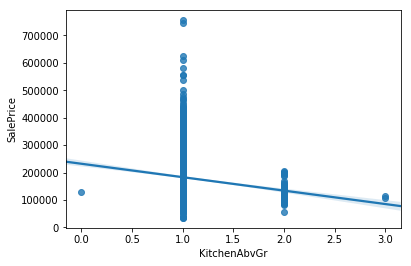

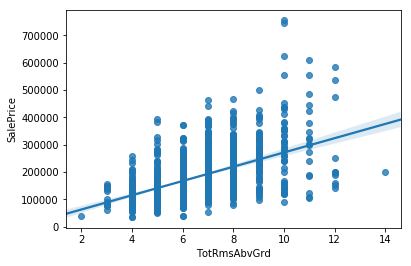

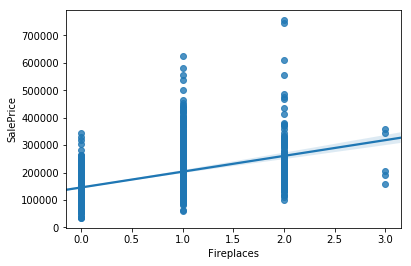

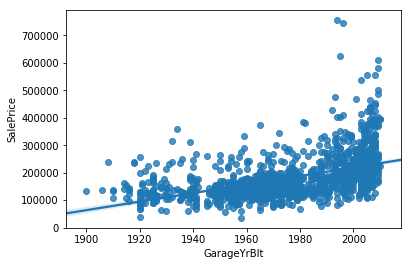

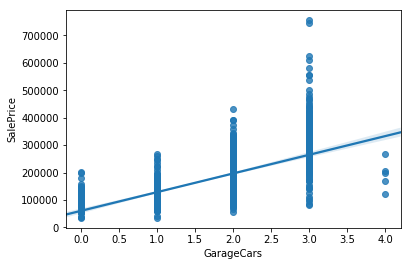

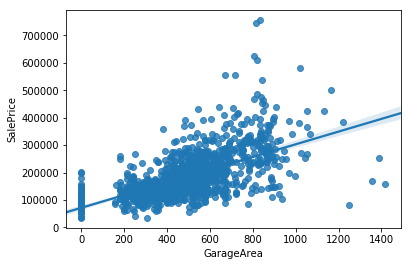

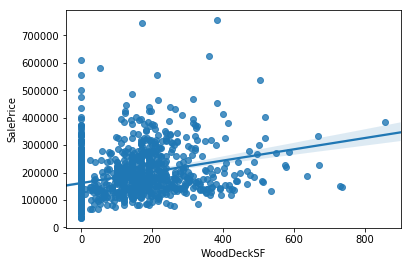

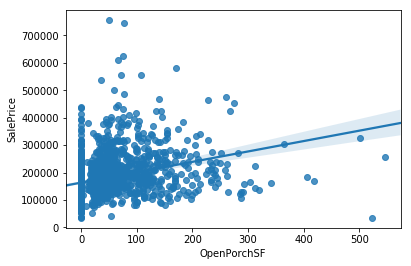

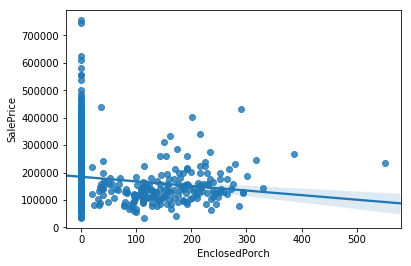

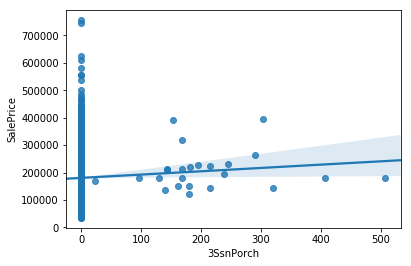

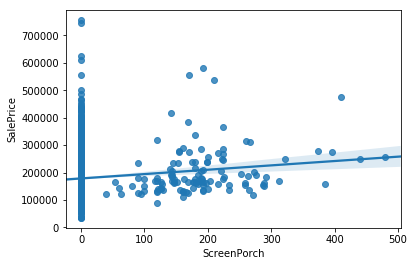

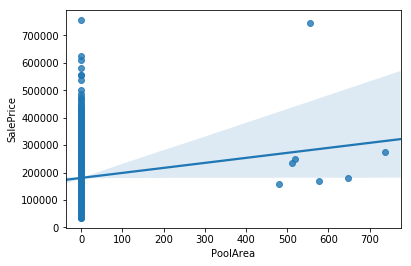

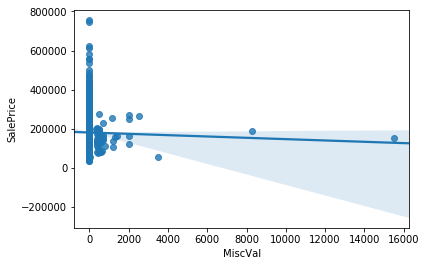

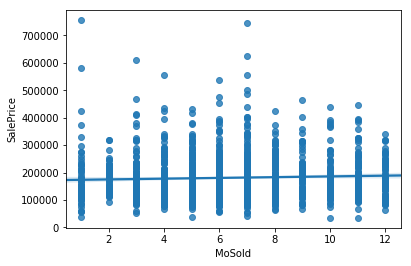

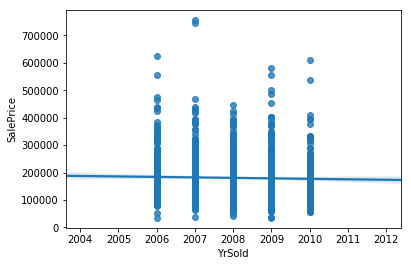

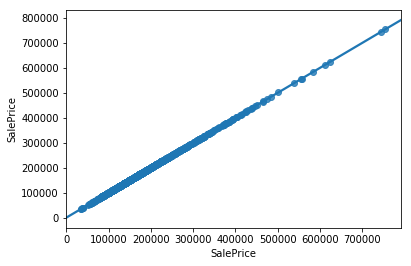

In [112]:
for i, col in enumerate(numeric.columns):
    plt.figure(i)
    sns.regplot(numeric[col], numeric['SalePrice'], data = numeric)

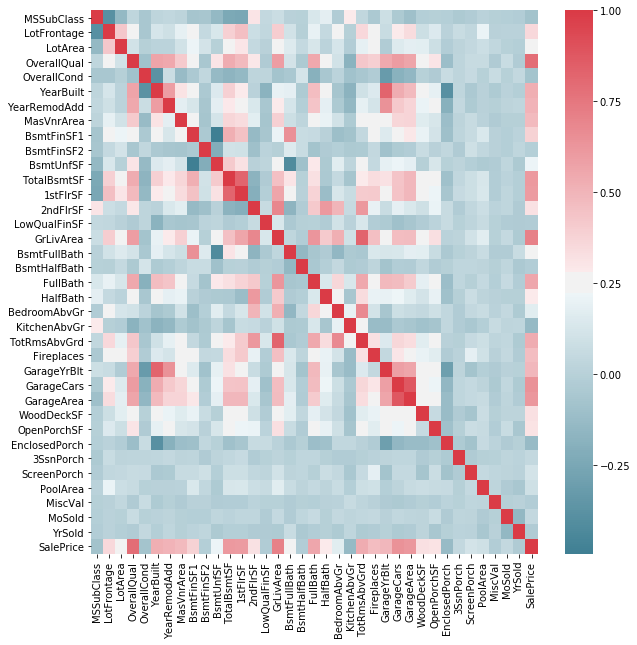

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True))

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.421309
LotFrontage     0.409076
WoodDeckSF      0.353802
HalfBath        0.343008
BsmtFinSF1      0.301871
Name: SalePrice, dtype: float64


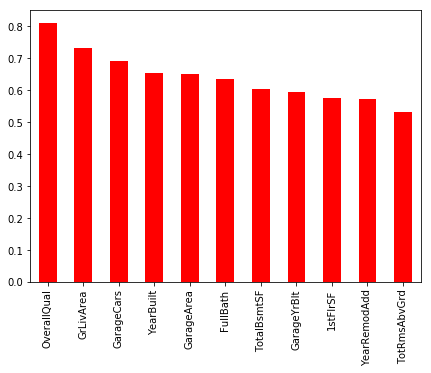

In [57]:
# correlations of numeric features with sale price
df.index
cor = df.loc[df.index, df.dtypes[df.dtypes != object].index.tolist()].corr(method='spearman').abs()
cor = cor.sort_values('SalePrice',axis=0,ascending=False).sort_values('SalePrice',axis=1,ascending=False)
print(cor.SalePrice.head(20)) # most correlated to sale price features 
plt.figure(figsize=(7,5))
cor.SalePrice[1:12].plot(kind = 'bar', color = 'red')

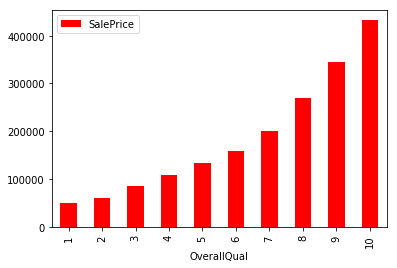

In [58]:
table = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
table.plot(kind='bar', color='red')
# as quality of house increases, quality also increases 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


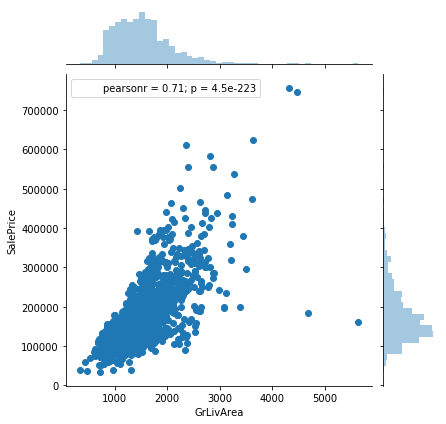

In [161]:
sns.jointplot(df['GrLivArea'], df['SalePrice'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


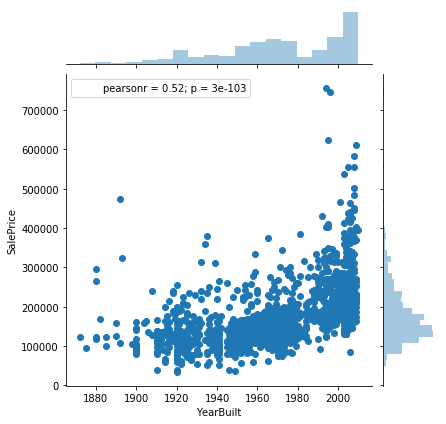

In [164]:
sns.jointplot(df['YearBuilt'], df['SalePrice'])

In [167]:
# outlier 
df[df['GrLivArea']>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


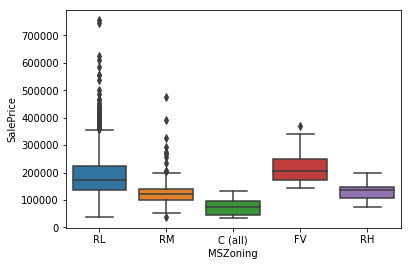

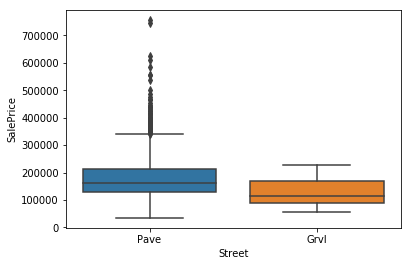

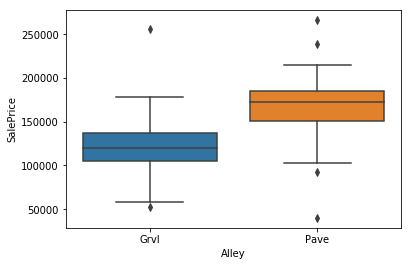

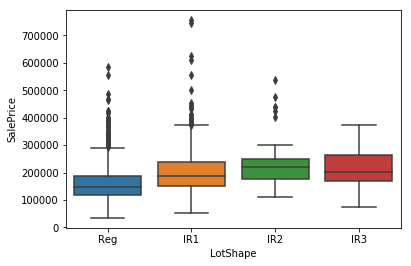

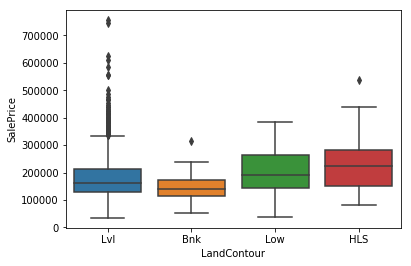

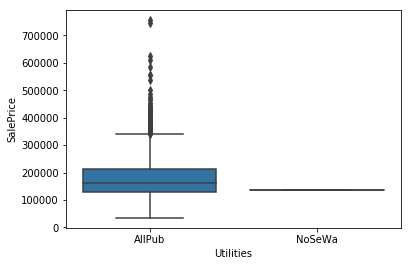

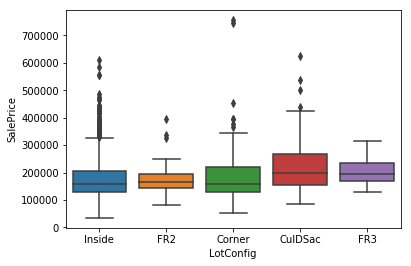

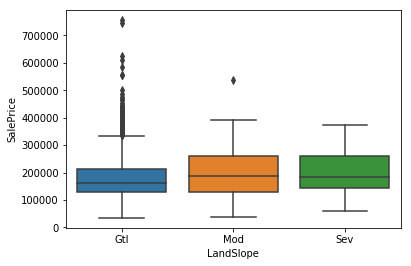

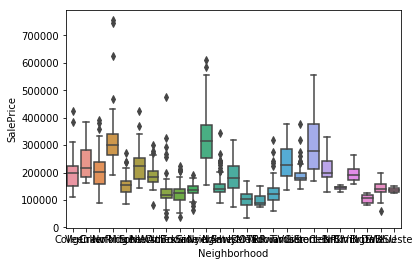

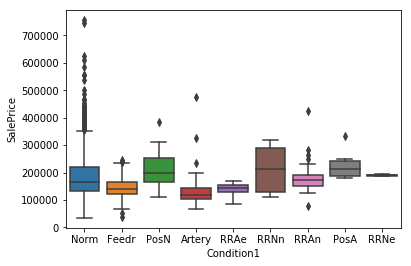

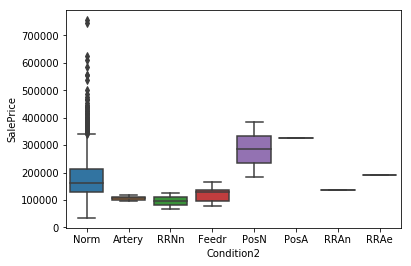

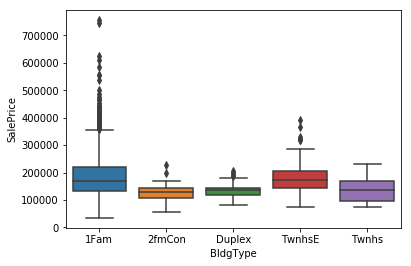

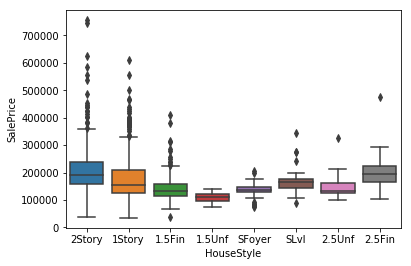

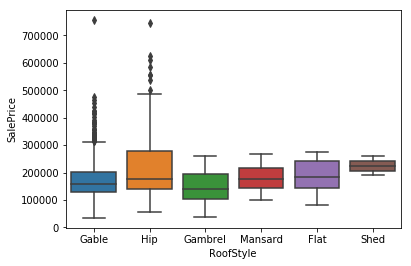

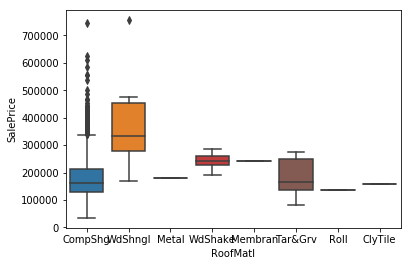

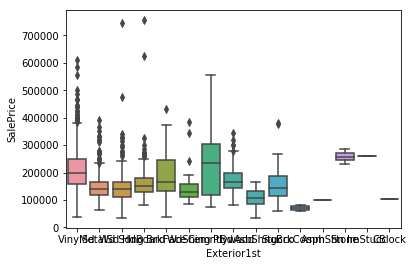

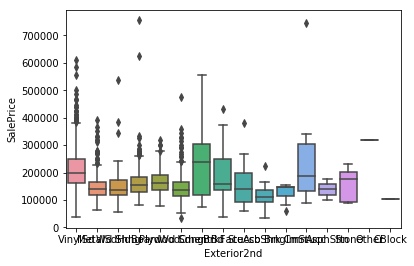

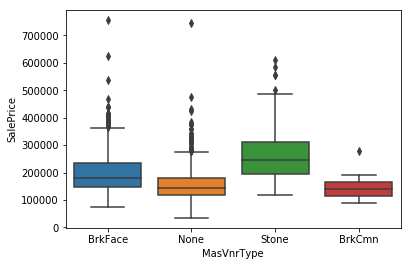

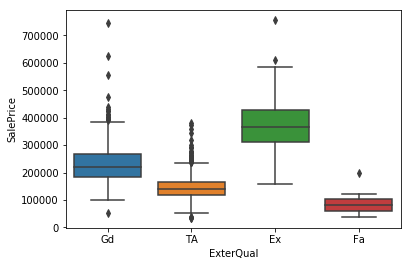

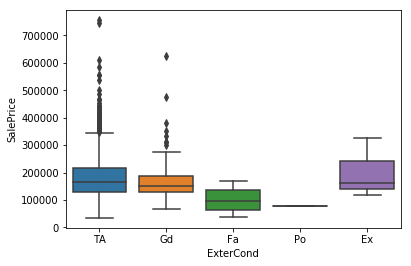

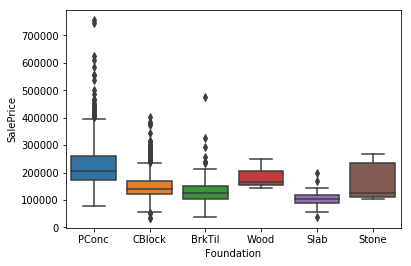

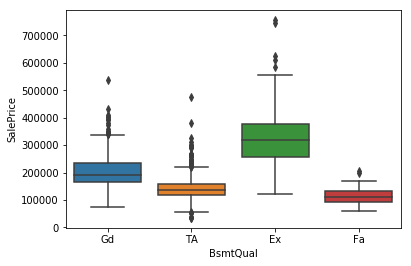

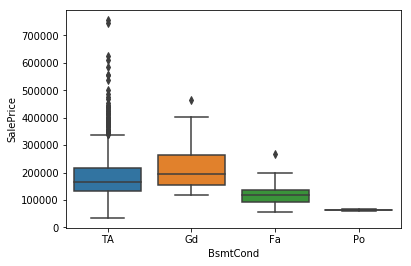

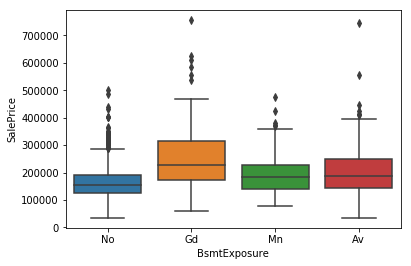

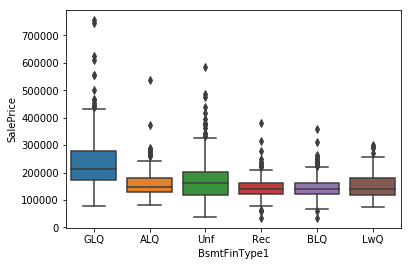

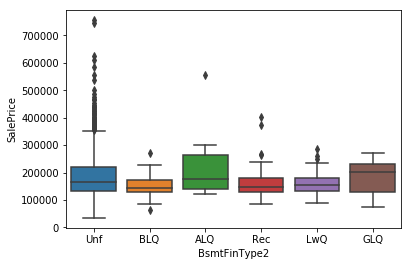

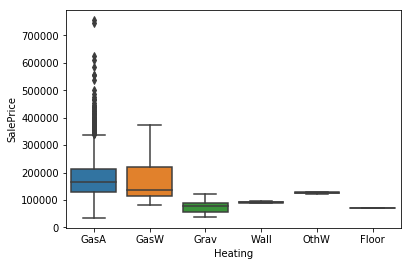

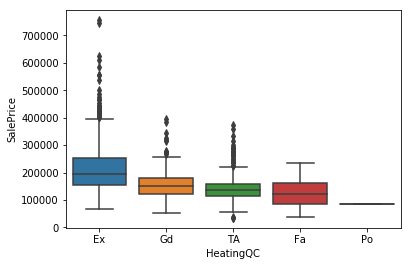

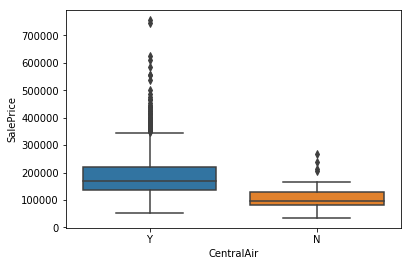

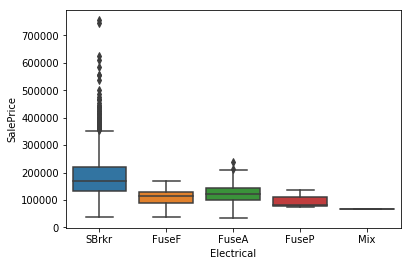

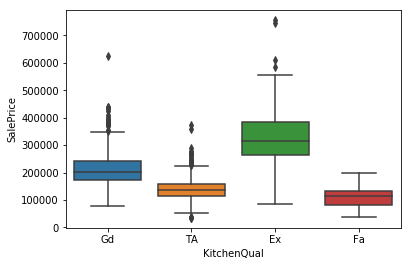

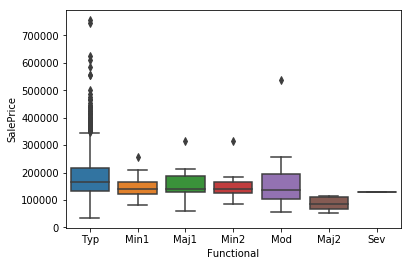

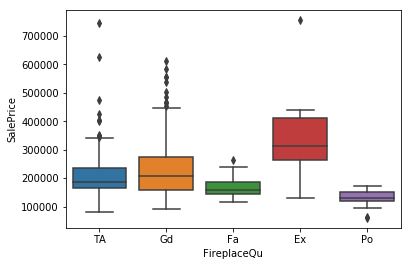

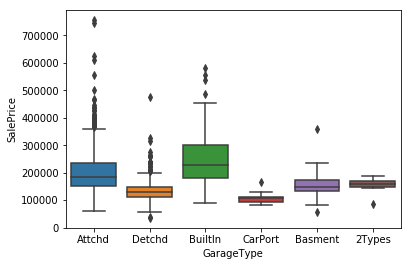

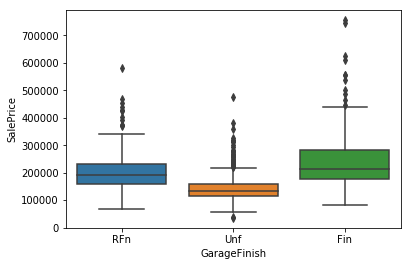

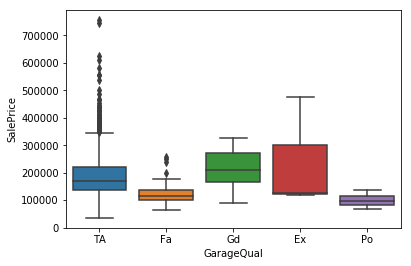

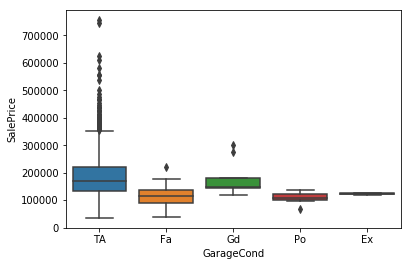

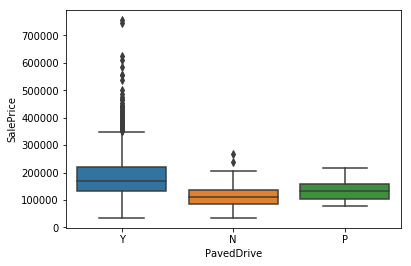

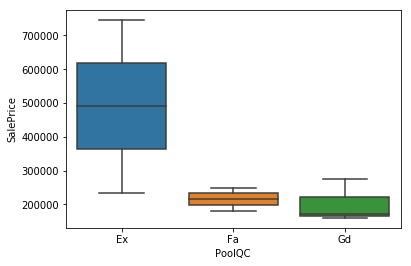

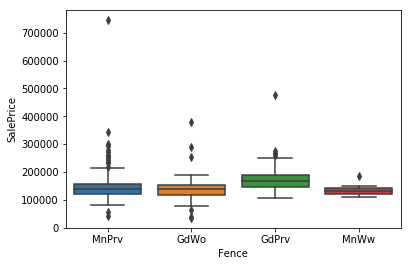

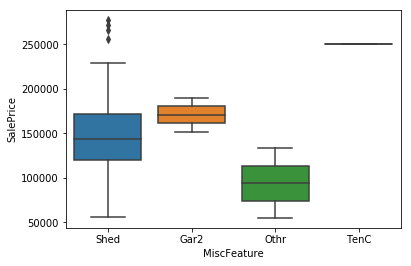

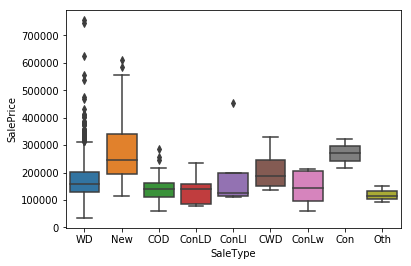

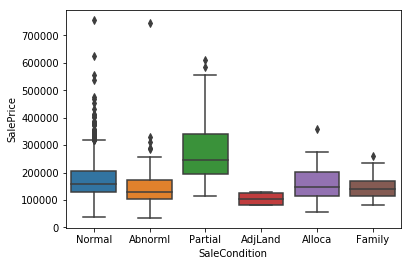

In [111]:
categorical = df.select_dtypes(include=['object'])
for i, col in enumerate(categorical.columns):
    plt.figure(i)
    sns.boxplot(categorical[col].dropna(), numeric['SalePrice'])

# Filling missing values 

In [4]:
df1 = df.copy()

In [5]:
# dropping an outlier 
df1.drop(df1[df1['GrLivArea']>4000].index, inplace = True)

In [6]:
# randomly impute one missing value in Electrical category 
df1['Electrical'] = df1['Electrical'].fillna(np.random.choice(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix']))
df1.loc[df1['MasVnrType'].isnull(),'MasVnrType'] = 'none'
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)

In [7]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df1[basement_cols][df1['BsmtQual'].isnull()==True]
for cols in basement_cols:
    if 'FinSF'not in cols:
        df1.loc[df1[cols].isnull(),cols] = 'none'

In [8]:
# df['Fireplaces'][df['FireplaceQu'].isnull()==True].describe()
df1.loc[df1['FireplaceQu'].isnull(), 'FireplaceQu'] = 'none'

In [9]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df1[garage_cols][df1['GarageType'].isnull()==True]
for cols in garage_cols:
    if df1[cols].dtype==np.object:
        df1.loc[df1[cols].isnull(),cols] = 'none'
    else:
        df1.loc[df1[cols].isnull(),cols] = 0

In [10]:
df1['PoolArea'][df1['PoolQC'].isnull()==True].describe()

count    1451.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [11]:
df1.loc[df1['PoolQC'].isnull(), 'PoolQC'] = 'none'

In [12]:
df1.loc[df1['Fence'].isnull(), 'Fence'] = 'none'
df1.loc[df1['MiscFeature'].isnull(), 'MiscFeature'] = 'none'

In [13]:
# SqrtLotArea and LotFrontage are correlated 
df1['SqrtLotArea']=np.sqrt(df1['LotArea'])
df1['LotFrontage'].corr(df1['SqrtLotArea'])

0.5801598110563013

In [14]:
df1.LotFrontage[df1['LotFrontage'].isnull()]=df1.SqrtLotArea[df1['LotFrontage'].isnull()]
del df1['SqrtLotArea']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df1.loc[df1['Alley'].isnull(),'Alley'] = 'none'

In [16]:
sum(df1[df1.columns[df1.isnull().any()]])
# no missing values anymore 

0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


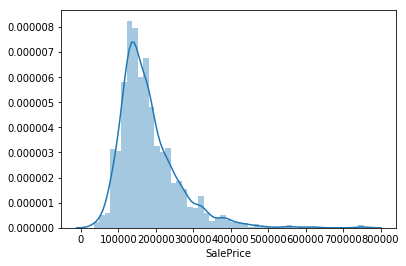

In [15]:
sns.distplot(df['SalePrice']) # price data is not normally distributed 
# need to transform 

In [17]:
ordinal = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish','GarageQual', 
'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [18]:
lot = {'Reg': 4 , 'IR1': 3, 'IR2': 2, 'IR3': 1}
util = {'AllPub': 4 , 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
slope = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
expo = {'Ex': 5, 'Gd':4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}
bsmt_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'none': 0}
bsmt_fin = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'none': 0}
electrical = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1}
functional = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
finish = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'none': 0}
paved = {'Y': 2, 'P': 1, 'N': 0}
fence = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'none': 0}

In [19]:
df2 = df1.replace({'LotShape': lot,
                         'Utilities': util,
                         'LandSlope': slope,
                         'ExterQual': expo,
                         'ExterCond': expo,
                         'BsmtQual': expo,
                         'BsmtCond': expo,
                         'BsmtExposure': bsmt_exposure,
                         'BsmtFinType1': bsmt_fin,
                         'BsmtFinType2': bsmt_fin,
                         'HeatingQC': expo,
                         'Electrical': electrical,
                         'KitchenQual': expo,
                         'Functional': functional,
                         'FireplaceQu': expo,
                         'GarageFinish': finish,
                         'GarageQual': expo,
                         'GarageCond': expo,
                         'PavedDrive': paved,
                         'PoolQC': expo,
                         'Fence': fence})   

In [20]:
nominal = []
for i in df1.select_dtypes(['object']).columns:
    if i not in ordinal:
        nominal.append(i)
nominal

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
other = []
for i in df1.columns:
    if i not in nominal:
        other.append(i)

In [22]:
# encoding nominal categorical variables 
df3 = df2[other].join(pd.get_dummies(df2[nominal]))

In [23]:
numeric = []
for i in df1.columns:
    if i not in nominal and i not in ordinal:
        numeric.append(i)

In [24]:
from scipy.stats import skew

In [80]:
df3[numeric].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
# log1p transform numeric columns with skew > 0.75
skew = df3[numeric].apply(lambda x: skew(x))
skew = skew[skew > 0.75]
skew = skew.index
df3[skew] = np.log1p(df3[skew])

# machine learning 

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [27]:
y = df3['SalePrice']
X = df3.drop(['SalePrice', 'Id'], axis = 1)

In [28]:
def rmse(y, pred):
    diff = pred - y
    sum_sq = sum(diff**2)    
    n = len(pred)   
    
    return np.sqrt(sum_sq/n)

In [61]:
# using PCA and Gradient Boosting Regressor 
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components = None)), ('boosting',GradientBoostingRegressor())])

In [62]:
param_grid = {
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[100, 150]
}

In [64]:
grid = GridSearchCV(pipeline, cv=5, param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
     ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'boosting__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'boosting__n_estimators': [100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
grid.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator__memory': None,
 'estimator__steps': [('scaling',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('pca',
   PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)),
  ('boosting',
   GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_impurity_split=None, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                n_estimators=100, presort='auto', random_state=None,
                subsample=1.0, verbose=0, warm_start=False))],
 'estimator__scaling': StandardScaler(copy=True, with_mean=True, with_std=True),
 'estimator__pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, wh

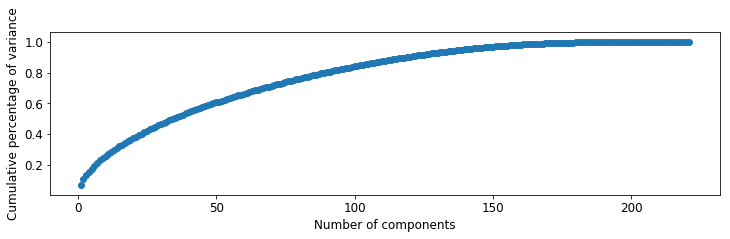

In [82]:
grid.best_estimator_.named_steps['pca'].explained_variance_
plt.figure(figsize=(12,3))
plt.scatter(range(1, 222), np.cumsum(grid.best_estimator_.named_steps['pca'].explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.rcParams.update({'font.size': 10})

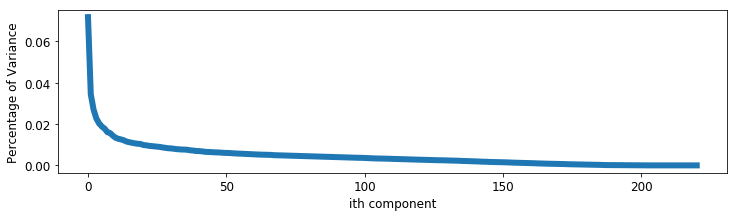

In [95]:
plt.figure(figsize=(12,3))
plt.plot(range(221), grid.best_estimator_.named_steps['pca'].explained_variance_ratio_, linewidth=6)
plt.xlabel('ith component')
plt.ylabel('Percentage of Variance')
plt.rcParams.update({'font.size': 12})

In [134]:
grid.best_estimator_.named_steps['pca'].components_

array([[ 0.01819445, -0.06820331, -0.06823002, ...,  0.00708138,
         0.04583443, -0.10402522],
       [-0.1842485 ,  0.17783868,  0.17467045, ...,  0.00608957,
         0.06503108, -0.10121347],
       [ 0.01136741,  0.19357655,  0.23197794, ...,  0.01000896,
         0.02366672, -0.02892257],
       ...,
       [-0.03189847, -0.00275232, -0.01959723, ..., -0.0950565 ,
        -0.01097139, -0.11762266],
       [ 0.00541221,  0.09067666,  0.01559714, ...,  0.01494698,
         0.02057827, -0.0697831 ],
       [ 0.02997514, -0.04336347, -0.05416269, ...,  0.04759137,
         0.03240332,  0.00825881]])

In [96]:
print("Best: %f using %s" % (grid.best_score_, 
    grid.best_params_))

Best: 0.873960 using {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 150}


In [104]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.011086 (0.005089) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 100, 'pca__n_components': 10}
0.011199 (0.004869) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 100, 'pca__n_components': 20}
0.011159 (0.005021) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 100, 'pca__n_components': 30}
0.011203 (0.004861) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 100, 'pca__n_components': 40}
0.011221 (0.004887) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 100, 'pca__n_components': 50}
0.018265 (0.005118) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 150, 'pca__n_components': 10}
0.018436 (0.004845) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 150, 'pca__n_components': 20}
0.018480 (0.004813) with: {'boosting__learning_rate': 0.0001, 'boosting__n_estimators': 150, 'pca__n_components': 30}
0.018509 (0.004702) with: {'boosting__learning_rate': 0.

In [104]:
# finding best PCA parameters 
param_grid11 = {
    'pca__n_components': [30, 50, 100, 150],
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[200]
}

In [105]:
grid11 = GridSearchCV(pipeline, cv=5, param_grid=param_grid11)
grid11.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
     ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [30, 50, 100, 150], 'boosting__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'boosting__n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
print("Best: %f using %s" % (grid11.best_score_, 
    grid11.best_params_))

Best: 0.874992 using {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 200, 'pca__n_components': 200}


In [114]:
pipeline0 = Pipeline([('boosting', GradientBoostingRegressor())])

In [115]:
param_grid_gb = {
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[100, 150]
}

In [116]:
grid0 = GridSearchCV(pipeline0, cv=5, param_grid=param_grid_gb)
grid0.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=N...=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'boosting__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'boosting__n_estimators': [100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
print("Best: %f using %s" % (grid0.best_score_, 
    grid0.best_params_))

Best: 0.910488 using {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 150}


In [38]:
grid0.best_estimator_

Pipeline(memory=None,
     steps=[('boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
            ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [42]:
#train R squared score GradientBoostingRegressor
grid0.best_estimator_.score(X,y)

0.9677737737610794

In [52]:
print(grid0.best_estimator_.named_steps["boosting"].feature_importances_)

[6.94757429e-04 2.05957473e-03 1.82416936e-02 2.22696556e-04
 0.00000000e+00 0.00000000e+00 4.19004568e-01 1.30878349e-02
 1.21725790e-02 1.52232436e-02 2.49252959e-04 3.22382874e-02
 1.36854279e-04 2.35611809e-02 5.08601107e-04 2.25870615e-03
 4.33964995e-03 2.18872152e-02 0.00000000e+00 4.12252394e-04
 1.24719215e-03 4.99805641e-02 4.93641779e-04 3.78017119e-05
 1.49761118e-02 5.89881891e-03 1.19169522e-04 1.55171891e-01
 7.09617322e-04 0.00000000e+00 1.77010737e-04 3.98134801e-04
 2.12199210e-04 0.00000000e+00 4.81141946e-02 1.55896685e-04
 3.10478137e-03 2.92422862e-04 1.36256308e-02 4.59256812e-03
 2.82249376e-02 3.99735080e-02 6.68650390e-03 2.75326727e-03
 1.78213212e-03 6.28091846e-04 9.85899161e-04 2.36034765e-03
 4.67406793e-04 3.01987276e-05 1.25076598e-03 6.09105333e-04
 0.00000000e+00 5.52293909e-05 0.00000000e+00 6.60188514e-04
 4.80980546e-04 5.47784148e-03 1.13881099e-04 1.41138212e-04
 3.20063692e-03 4.92506962e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.712277

Text(0.5,1,'Relative Importance')

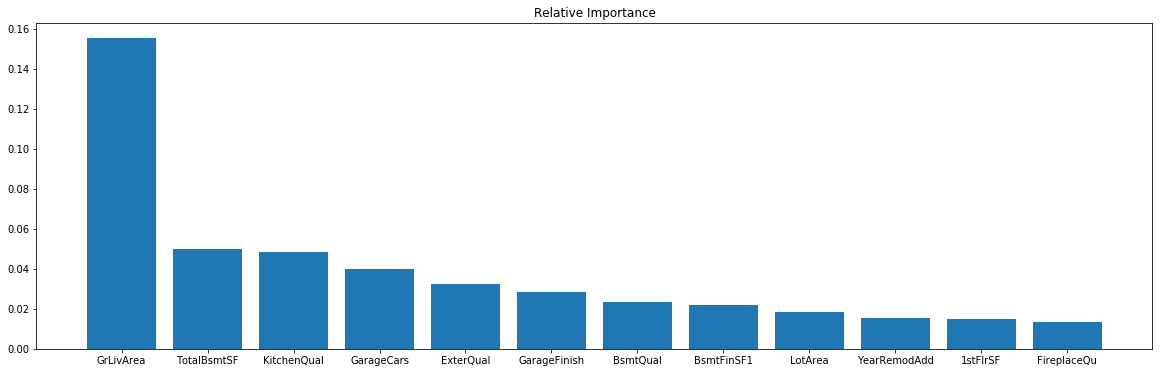

In [149]:
# sorted by most important features 
sc = pd.DataFrame(np.array(X.columns), grid0.best_estimator_.named_steps["boosting"].feature_importances_)
sc = sc.reset_index()
sc.columns = ['score', 'feature']
sc1 = sc.sort_values('score', ascending = False)[1:13]
plt.figure(figsize=(20, 6)) 
plt.bar(sc1['feature'], sc1['score']) 
plt.title('Relative Importance')

In [132]:
# XGBRegressor - another implementation 
estimator = XGBRegressor()

In [73]:
classifier = GridSearchCV(estimator=estimator, cv=5, param_grid= {
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'n_estimators':[250],
    'max_depth': [3]
}) 

In [74]:
classifier.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [250], 'max_depth': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
classifier.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [76]:
# R squared score for XGBRegressor 
classifier.best_estimator_.score(X,y)

0.9787128514798062

In [77]:
predictions = classifier.predict(df_test3)
predictions

df_test12 = df_test.copy()
df_test12['SalePrice'] = np.expm1(predictions)
df_new = df_test12[['Id', 'SalePrice']]
df_new.to_csv('~/Desktop/pred.csv')

In [78]:
# using ElasticNet
pipeline4 = Pipeline([('scaling', StandardScaler()), ('linear', linear_model.ElasticNet())])
grid4 = GridSearchCV(pipeline4, cv=5, param_grid= {'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]})
grid4.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
print("Best: %f using %s" % (grid4.best_score_, 
    grid4.best_params_))

Best: 0.817771 using {'linear__alpha': 0.1}


In [298]:
# using Lasso 
pipeline1 = Pipeline([('scaling', StandardScaler()), ('linear', linear_model.Lasso())])
grid1 = GridSearchCV(pipeline1, cv=5, param_grid= {'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]})
grid1.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 we

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print("Best: %f using %s" % (grid1.best_score_, 
    grid1.best_params_))

Best: 0.711622 using {'linear__alpha': 0.1}


In [46]:
grid1.best_estimator_.score(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7149604262140399

In [302]:
# Ridge 
pipeline2 = Pipeline([('scaling', StandardScaler()), ('linear', linear_model.Ridge())])
grid2 = GridSearchCV(pipeline2, cv=5, param_grid= {'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]})
grid2.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 we

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'linear__alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [303]:
print("Best: %f using %s" % (grid2.best_score_, 
    grid2.best_params_))

Best: 0.887064 using {'linear__alpha': 4}


In [127]:
means = grid2.cv_results_['mean_test_score']
stds = grid2.cv_results_['std_test_score']
params = grid2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.886078 (0.021876) with: {'linear__alpha': 0.1}
0.886120 (0.021877) with: {'linear__alpha': 0.2}
0.886223 (0.021887) with: {'linear__alpha': 0.5}
0.886366 (0.021906) with: {'linear__alpha': 1}
0.886619 (0.021946) with: {'linear__alpha': 2}
0.886845 (0.021981) with: {'linear__alpha': 3}
0.887054 (0.022013) with: {'linear__alpha': 4}


In [126]:
grid2.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.02250218, 0.02098951, 0.01914406, 0.01973858, 0.02293706,
        0.02729917, 0.02429152]),
 'std_fit_time': array([0.00364779, 0.00394008, 0.00238164, 0.00246584, 0.00191127,
        0.00275579, 0.00438656]),
 'mean_score_time': array([0.00269623, 0.00259981, 0.00241437, 0.00217938, 0.00291495,
        0.00336518, 0.00234809]),
 'std_score_time': array([0.0006996 , 0.0010016 , 0.00077813, 0.00015564, 0.00090853,
        0.00051706, 0.00030237]),
 'param_linear__alpha': masked_array(data=[0.1, 0.2, 0.5, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'linear__alpha': 0.1},
  {'linear__alpha': 0.2},
  {'linear__alpha': 0.5},
  {'linear__alpha': 1},
  {'linear__alpha': 2},
  {'linear__alpha': 3},
  {'linear__alpha': 4}],
 'split0_test_score': array([0.91323533, 0.91326009, 0.913344  , 0.91348936, 0.91376857,
        0.91402705, 0.91426669]),
 'split1_test_score':

In [50]:
# support vector regression 
pipeline3 = Pipeline([('scaling', StandardScaler()),('pca', PCA(n_components=30)), ('svr', SVR(cache_size=7000))])

In [ ]:
param_grid3 = {
    'svr__kernel':['linear', 'poly', 'rbf'],
    'svr__C':[1e5, 1e3, 1]
}

grid3 = GridSearchCV(pipeline3, cv=5, param_grid = param_grid3)
grid3.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [ ]:
# print("Best: %f using %s" % (grid2.best_score_, 
    grid3.best_params_))

# Creating new features 

In [31]:
# total area of house 
df4 = df3.copy()
area_cols = ['TotalBsmtSF','GrLivArea', 'GarageArea', 'EnclosedPorch', 'ScreenPorch']
df4['1stFlrFrac'] = df4['1stFlrSF']/df4['GrLivArea']
df4['2ndFlrFrac'] = df4['2ndFlrSF']/df4['GrLivArea']

In [32]:
df4["TotalArea"] = df4[area_cols].sum(axis=1)

In [33]:
df4['AgeWhenSold'] = df4['YrSold'] - df4['YearBuilt']
df4["YearsSinceRemodel"] = df4["YrSold"] - df4["YearRemodAdd"]

In [34]:
# was house sold in the year it was built 
df4['NewHouse'] = (df4['YearBuilt'] == df4['YrSold'])*1

In [35]:
# did remodeling take place in year house was sold 
df4['RecRemodel'] = (df4['YearRemodAdd'] == df4['YrSold']) * 1

In [36]:
y2 = df4['SalePrice']
X2 = df4.drop(['SalePrice', 'Id'], axis = 1)

In [37]:
# testing model with more features using Gradient Boosting regressor 
estimator = GradientBoostingRegressor()
classifier = GridSearchCV(estimator=estimator, cv=5, param_grid= {
    'learning_rate':[0.001, 0.01, 0.1],
    'n_estimators':[250],
    'max_depth': [3]
}) 

In [122]:
classifier.fit(X2, y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [250], 'max_depth': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
classifier.best_estimator_.score(X2,y2)

0.97916679613944

In [124]:
# train error 
rmse(y2, classifier.best_estimator_.predict(X2))

0.05714901344573253

In [125]:
predictions = classifier.predict(df_test4)
predictions

array([11.55393512, 11.83983191, 12.03457639, ..., 11.81375179,
       11.47634576, 12.15724915])

In [91]:
df_test12 = df_test.copy()
df_test12['SalePrice'] = np.expm1(predictions)
df_new = df_test12[['Id', 'SalePrice']]
df_new.to_csv('~/Desktop/pred.csv')

In [ ]:
# testing model with more features using PCA and gradient boosting regressor 

In [87]:
pipeline5 = Pipeline([('scaling', StandardScaler()),('pca', PCA()),('boosting', GradientBoostingRegressor())])

In [88]:
param_grid5 = {
    'pca__n_components':[30, 40, 50, 100],
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[150]
}

In [89]:
grid5 = GridSearchCV(pipeline5, cv=5, param_grid=param_grid5)
grid5.fit(X2,y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('boosting', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
     ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [30, 40, 50, 100], 'boosting__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'boosting__n_estimators': [150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
print("Best: %f using %s" % (grid5.best_score_, 
    grid5.best_params_))

Best: 0.864737 using {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 150, 'pca__n_components': 40}


# Test set 

In [79]:
df_test[df_test.columns[df_test.isnull().any()]].dtypes

MSZoning         object
LotFrontage     float64
Alley            object
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
dtype: object

In [38]:
df_test1 = df_test.copy()

In [39]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df_test1[garage_cols][df_test1['GarageType'].isnull()==True]
for cols in garage_cols:
    if df_test1[cols].dtype==np.object:
        df_test1.loc[df_test1[cols].isnull(),cols] = 'none'
    else:
        df_test1.loc[df_test1[cols].isnull(),cols] = 0

In [40]:
df_test1['TotalBsmtSF'] = df_test1['TotalBsmtSF'].fillna(0)
df_test1['BsmtUnfSF'] = df_test1['BsmtUnfSF'].fillna(0)

In [41]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df_test1[basement_cols][df_test1['BsmtQual'].isnull()==True]
for cols in basement_cols:
    if 'FinSF'not in cols:
        df_test1.loc[df_test1[cols].isnull(),cols] = 'none'
df_test1.loc[df_test1['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = 0
df_test1.loc[df_test1['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = 0

In [42]:
df_test1.loc[df_test1['MSZoning'].isnull(),'MSZoning'] = 'RL'
df_test1.loc[df_test1['Utilities'].isnull(),'Utilities'] = 'AllPub'
df_test1.loc[df_test1['Exterior2nd'].isnull(),'Exterior2nd'] = 'VinylSd'
df_test1.loc[df_test1['Exterior1st'].isnull(),'Exterior1st'] = 'HdBoard'
df_test1.loc[df_test1['BsmtFullBath'].isnull(),'BsmtFullBath'] = 0
df_test1.loc[df_test1['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 0
df_test1.loc[df_test1['KitchenQual'].isnull(),'KitchenQual'] = 'TA'
df_test1.loc[df_test1['Functional'].isnull(),'Functional'] = 'Typ'
df_test1.loc[df_test1['FireplaceQu'].isnull(), 'FireplaceQu'] = 'none'
df_test1.loc[df_test1['PoolQC'].isnull(), 'PoolQC'] = 'none'
df_test1.loc[df_test1['Fence'].isnull(), 'Fence'] = 'none'
df_test1.loc[df_test1['MiscFeature'].isnull(), 'MiscFeature'] = 'none'
df_test1.loc[df_test1['SaleType'].isnull(), 'SaleType'] = 'WD'

In [43]:
df_test1.loc[df_test1['Alley'].isnull(),'Alley'] = 'none'

In [44]:
df_test1.loc[df_test1['MasVnrType'].isnull(),'MasVnrType'] = 'none'
df_test1['MasVnrArea'] = df_test1['MasVnrArea'].fillna(0)

In [45]:
df_test1['SqrtLotArea']=np.sqrt(df_test1['LotArea'])
df_test1.LotFrontage[df_test1['LotFrontage'].isnull()]=df_test1.SqrtLotArea[df_test1['LotFrontage'].isnull()]
del df_test1['SqrtLotArea']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
df_test1[df_test1.columns[df_test1.isnull().any()]].dtypes
# no missing values anymore 

Series([], dtype: object)

In [47]:
df_test2 = df_test1.replace({'LotShape': lot,
                         'Utilities': util,
                         'LandSlope': slope,
                         'ExterQual': expo,
                         'ExterCond': expo,
                         'BsmtQual': expo,
                         'BsmtCond': expo,
                         'BsmtExposure': bsmt_exposure,
                         'BsmtFinType1': bsmt_fin,
                         'BsmtFinType2': bsmt_fin,
                         'HeatingQC': expo,
                         'Electrical': electrical,
                         'KitchenQual': expo,
                         'Functional': functional,
                         'FireplaceQu': expo,
                         'GarageFinish': finish,
                         'GarageQual': expo,
                         'GarageCond': expo,
                         'PavedDrive': paved,
                         'PoolQC': expo,
                         'Fence': fence}) 

In [48]:
other1 = other.copy()
other1.remove('SalePrice')

In [49]:
# encoding nominal categorical variables 
#df_test3 = df_test2[other1].join(pd.get_dummies(df_test2[nominal])).reindex(columns=pd.get_dummies(df2[nominal]).columns)
df_test3 = df_test2[other1].join(pd.get_dummies(df_test2[nominal]))

In [50]:
numeric = []
for i in df_test3.columns:
    if i not in nominal and i not in ordinal:
        numeric.append(i)

In [51]:
# log1p transform numeric columns with skew > 0.75
from scipy.stats import skew
skew = df_test3[numeric].apply(lambda x: skew(x))
skew = skew[skew > 0.75]
skew = skew.index
df_test3[skew] = np.log1p(df_test3[skew])

In [52]:
# adding missing columns; set values to be zero; accounting for one hot encoding 
k = []
for i in X.columns:
    if i not in df_test3.columns:
        df_test3[i]=0

In [53]:
df_test3.drop('Id', inplace = True, axis = 1)

In [54]:
# new features
df_test4 = df_test3.copy()
df_test4["TotalArea"] = df_test3[area_cols].sum(axis=1)
df_test4['AgeWhenSold'] = df_test3['YrSold'] - df_test3['YearBuilt']
df_test4["YearsSinceRemodel"] = df_test3["YrSold"] - df_test3["YearRemodAdd"]

In [55]:
df_test4['1stFlrFrac'] = df_test4['1stFlrSF']/df_test4['GrLivArea']
df_test4['2ndFlrFrac'] = df_test4['2ndFlrSF']/df_test4['GrLivArea']

In [56]:
# was house sold in the year it was built 
df_test4['NewHouse'] = (df_test4['YearBuilt'] == df_test4['YrSold'])*1

In [57]:
# did remodeling take place in year house was sold 
df_test4['RecRemodel'] = (df_test4['YearRemodAdd'] == df_test4['YrSold']) * 1